# LDDS

## Tutorial 8: Lagrangian descriptors for maps

In this notebook we explain how to compute Lagrangian descriptors for discrete dynamical systems (maps). We do so by applying the method to two classical examples, the standard map, and Hénon map.

For discrete systems we have implemented a separate module, with functions specifically designed to handle these systems, where trajectories are obtained via iterations of a map rather than solving ODEs. We begin by importing the LDDS module, and from it, all the functions necessary to calculate and plot LDs for maps.

In [1]:
import os, sys
sys.path.insert(1, os.pardir)
import ldds
from ldds.discrete_maps import StandardMap, StandardMap_inverse
from ldds.discrete_maps import HenonMap, HenonMap_inverse
from ldds.base_discrete import compute_lagrangian_descriptor
from ldds.tools import draw_all_lds
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Standard map

The standard map (kicked rotator) is a two-dimensional map used in dynamical systems to study a periodically 
kicked pendulum. The equations of the discrete system are given by the expressions:

$$
\begin{cases}
x_{n+1} = x_{n} + y_{n} - \dfrac{K}{2\pi} \sin(2\pi x_{n}) \\[.2cm]
y_{n+1} = y_{n} - \dfrac{K}{2\pi} \sin(2\pi x_{n})
\end{cases}
$$

where $K$ is the parameter that controls the forcing strength of the perturbation. The inverse map is described by:

\begin{cases}
    x_{n} = x_{n+1} - y_{n+1} \\[.2cm]
    y_{n} = y_{n+1} + \dfrac{K}{2\pi} \sin(2\pi (x_{n+1} - y_{n+1}))
\end{cases}

### Define the Standard Map

In [2]:
# Define the standard map parameter
K = 1.2
# Define the discrete-time system and its inverse
discrete_map = lambda t, u: StandardMap(t, u,PARAMETERS=[K, 1])
discrete_map_inverse = lambda t, u: StandardMap_inverse(t, u, PARAMETERS=[K, 1])
f = discrete_map
f_inverse = discrete_map_inverse

### Define 2D Grid to Compute Lagrangian Descriptors

In [3]:
# Define the 2D grid in the phase space to compute LDs
x_min, x_max, Nx = [-0.5, 0.5, 600]
y_min, y_max, Ny = [-0.5, 0.5, 600]
grid_parameters = [[x_min, x_max, Nx],[y_min, y_max, Ny]]

### Define Lagrangian Descriptors

In [4]:
# Define the parameters to calculate Lagragial descriptors

# We will use the p-seminorm definition of LDs
p_value = 1/2
# Number of forward and backward iterations of the map
N_iterations = 20
box_boundaries = False

# We impose periodic boundary conditions to account for the periodicity of the phase space of the standard map
Lx, Ly = [1, 1]
periodic_boundaries = [(0, Lx), (0, Ly)]

### Compute and Draw Langrangian Descriptors

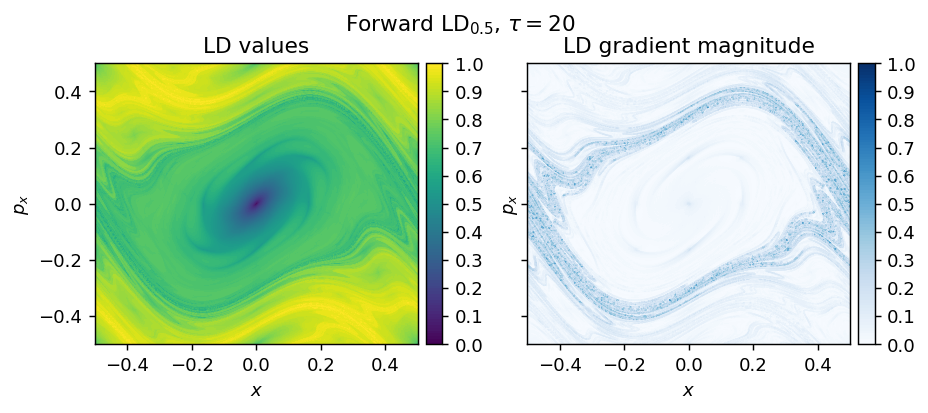

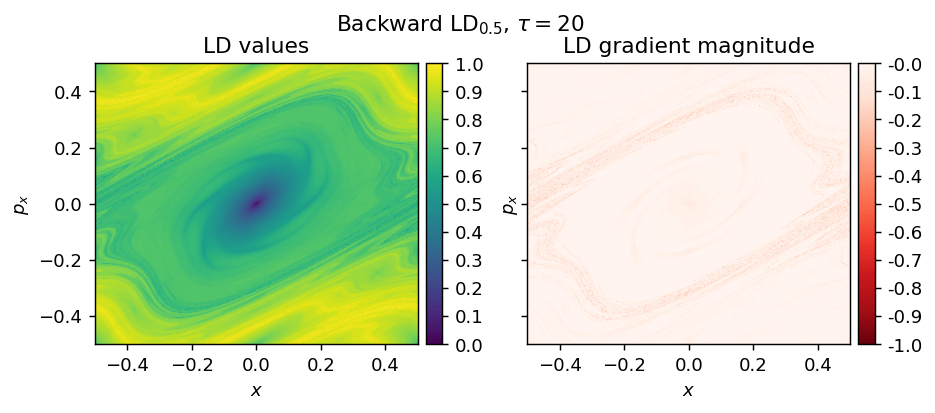

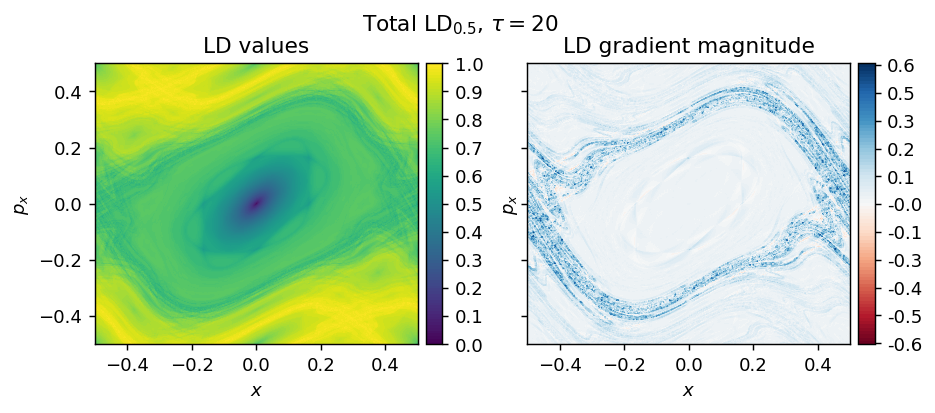

In [5]:
# Compute LDs

LD_forward = compute_lagrangian_descriptor(grid_parameters, f, N_iterations, p_value, box_boundaries, periodic_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, f_inverse, N_iterations, p_value, box_boundaries, periodic_boundaries)

# Draw LDs
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, N_iterations, p_value)

### Calculate LDs for a different parameter value of the standard map

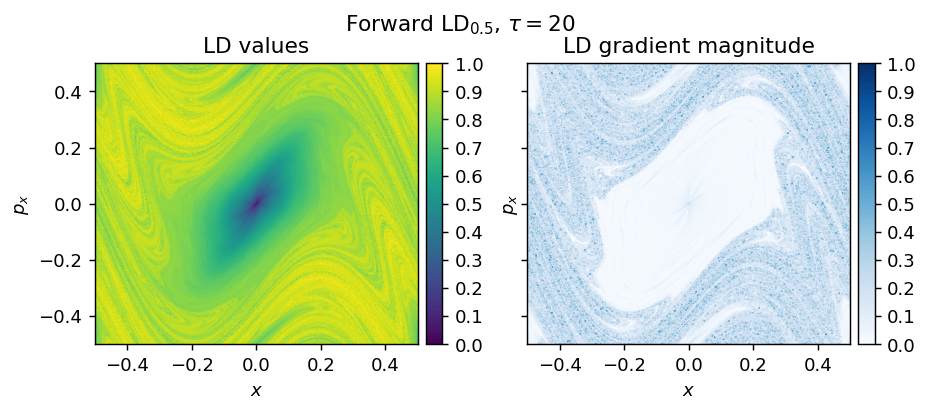

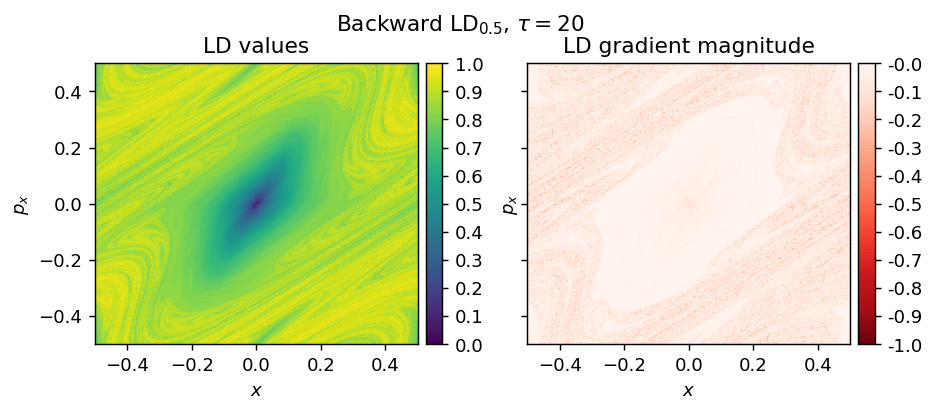

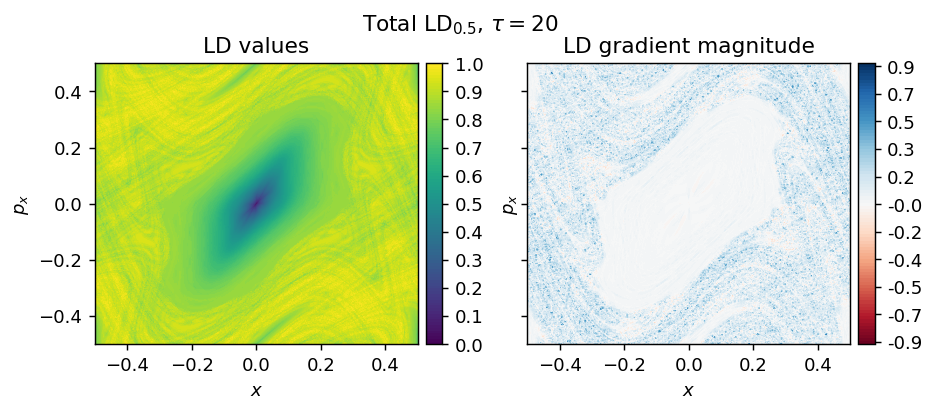

In [6]:
# Define the standard map parameter
K = 2

# Compute LDs
LD_forward = compute_lagrangian_descriptor(grid_parameters, f, N_iterations, p_value, box_boundaries, periodic_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, f_inverse, N_iterations, p_value, box_boundaries, periodic_boundaries)

# Draw LDs
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, N_iterations, p_value)

## Hénon map

The map equations are as follows:

   \begin{cases}
    x_{n+1} = a - x_{n}^2 + b y_{n} \\[.2cm]
    y_{n+1} = x_{n}
   \end{cases}
   
where $a,\,b $ are the model parameters. The inverse Hénon map is:
   \begin{cases}
    x_{n} = y_{n+1} \\[.2cm]
    y_{n} = \dfrac{x_{n+1} - a + y_{n+1}^2}{b} 
   \end{cases}

### Define the Hénon Map

In [7]:
# Define the Hénon map parameters
a, b = [0.298, 1]

# Define the discrete-time system and its inverse
discrete_map = lambda t, u: HenonMap(t, u,PARAMETERS=[a, b, 1])
discrete_map_inverse = lambda t, u: HenonMap_inverse(t, u,PARAMETERS=[a, b, 1])
f = discrete_map
f_inverse = discrete_map_inverse

### Define 2D Grid to Compute Lagrangian Descriptors

In [8]:
# Define the 2D grid in the phase space to compute LDs
x_min, x_max, Nx = [-1.5, 1.5, 600]
y_min, y_max, Ny = [-1.5, 1.5, 600]
grid_parameters = [[x_min, x_max, Nx],[y_min, y_max, Ny]]

### Define Lagrangian Descriptors

In [9]:
# Define the parameters to calculate Lagrangian descriptors

# We will use the p-seminorm definition of LDs
p_value = 0.5
# Number of forward and backward iterations of the map
N_iterations = 12
# Stop orbits if they exit the following square region of the phase space
box_boundaries = [(-5, 5),(-5, 5)]

periodic_boundaries = False

### Compute and Draw Langrangian Descriptors

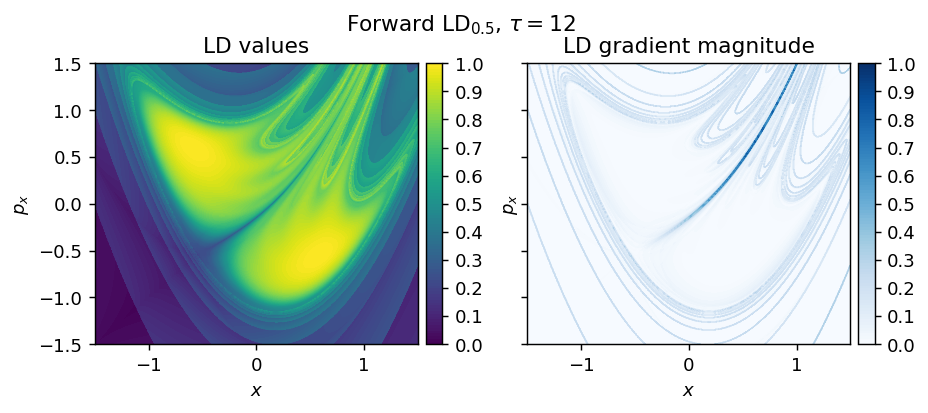

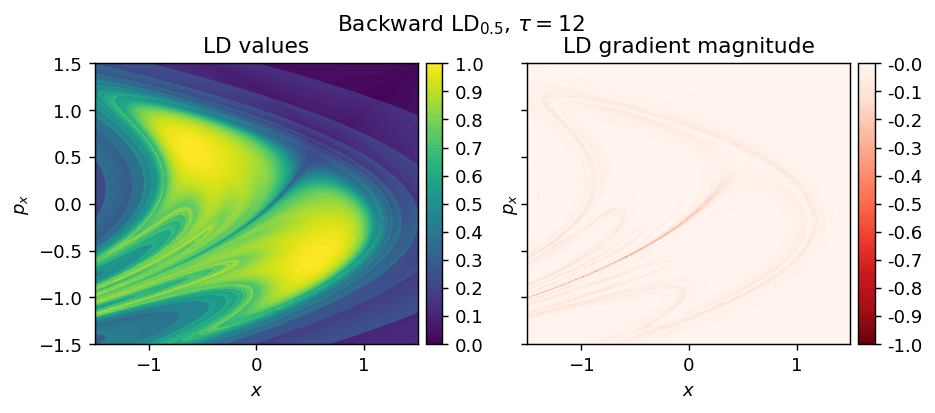

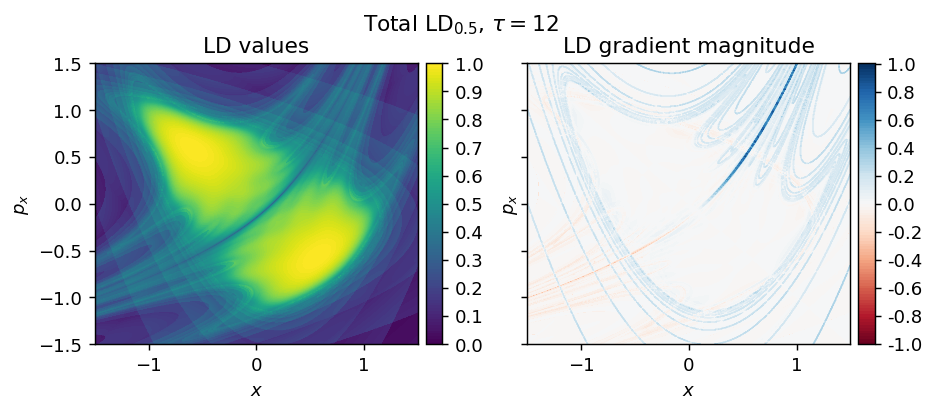

In [10]:
# Compute LDs
LD_forward = compute_lagrangian_descriptor(grid_parameters, f, N_iterations, p_value, box_boundaries, periodic_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, f_inverse, N_iterations, p_value, box_boundaries, periodic_boundaries)

# Draw LDs
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, N_iterations, p_value)

### Calculate Lagrangian descriptors for other parameter values of the Hénon map

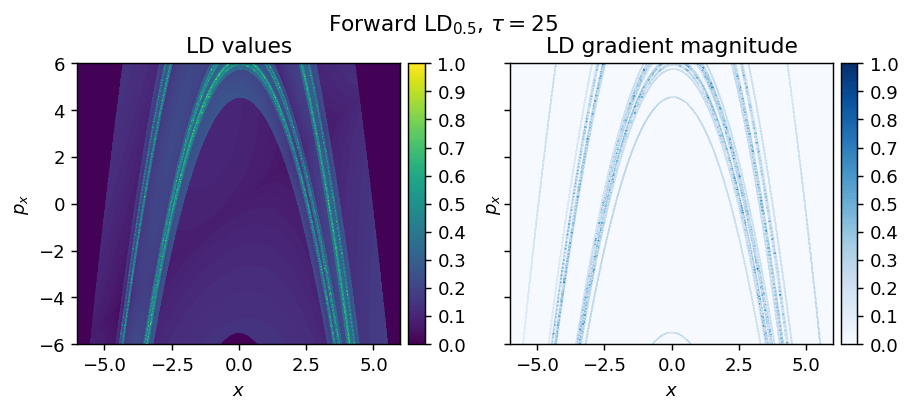

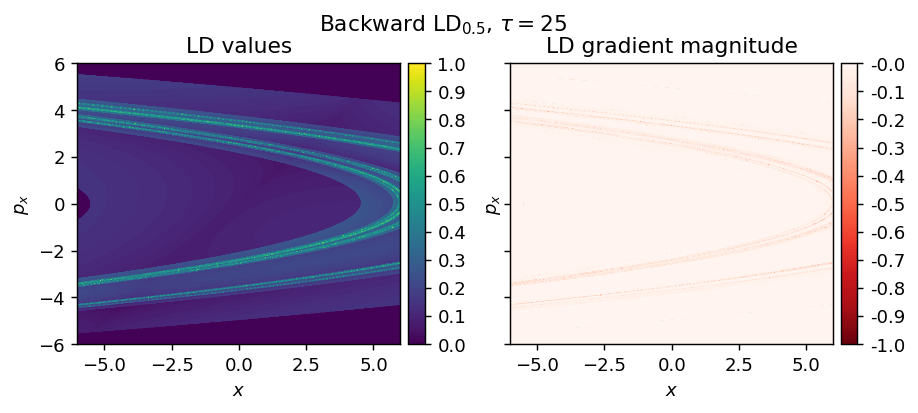

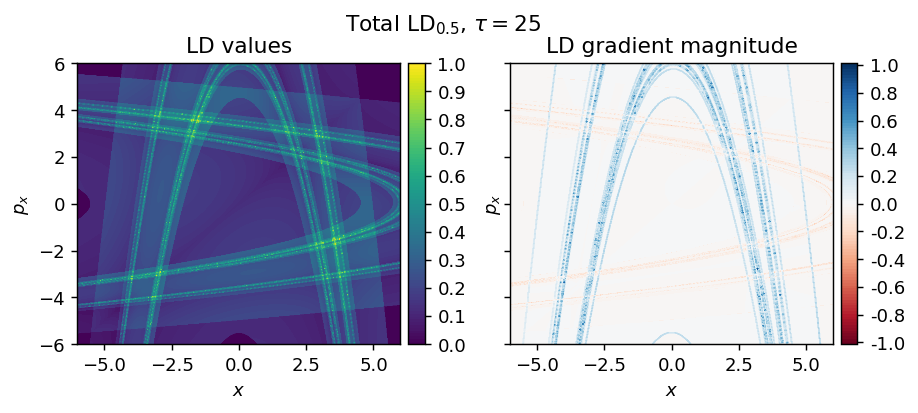

In [11]:
# Define the Hénon map parameters
a, b = [9.5, -1]

# Define the 2D grid in the phase space to compute LDs
x_min, x_max, Nx = [-6, 6, 600]
y_min, y_max, Ny = [-6, 6, 600]
grid_parameters = [[x_min, x_max, Nx],[y_min, y_max, Ny]]

# Define the parameters to calculate Lagrangian descriptors

# We will use the p-seminorm definition of LDs
p_value = 0.5
# Number of forward and backward iterations of the map
N_iterations = 25
# Stop orbits if they exit the following square region of the phase space
box_boundaries = [(-15, 15),(-15, 15)]
periodic_boundaries = False

# Compute LDs
LD_forward = compute_lagrangian_descriptor(grid_parameters, f, N_iterations, p_value, box_boundaries, periodic_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, f_inverse, N_iterations, p_value, box_boundaries, periodic_boundaries)

# Draw LDs
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, N_iterations, p_value)